In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_1samp,ttest_ind

In [4]:
df=pd.read_csv("Wholesale+Customers+Data.csv")

In [5]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [6]:
df.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125
439,440,Hotel,Other,2787,1698,2510,65,477,52


#1.1 Use methods of descriptive statistics to summarize data.Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [7]:
df.dtypes

Buyer/Spender        int64
Channel             object
Region              object
Fresh                int64
Milk                 int64
Grocery              int64
Frozen               int64
Detergents_Paper     int64
Delicatessen         int64
dtype: object

In [8]:
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [9]:
df.shape
print("The total Number of rows and coloumns are:",df.shape,"respectively")

The total Number of rows and coloumns are: (440, 9) respectively


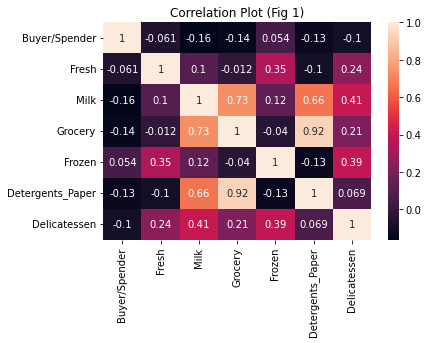

In [10]:
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.title("Correlation Plot (Fig 1)");

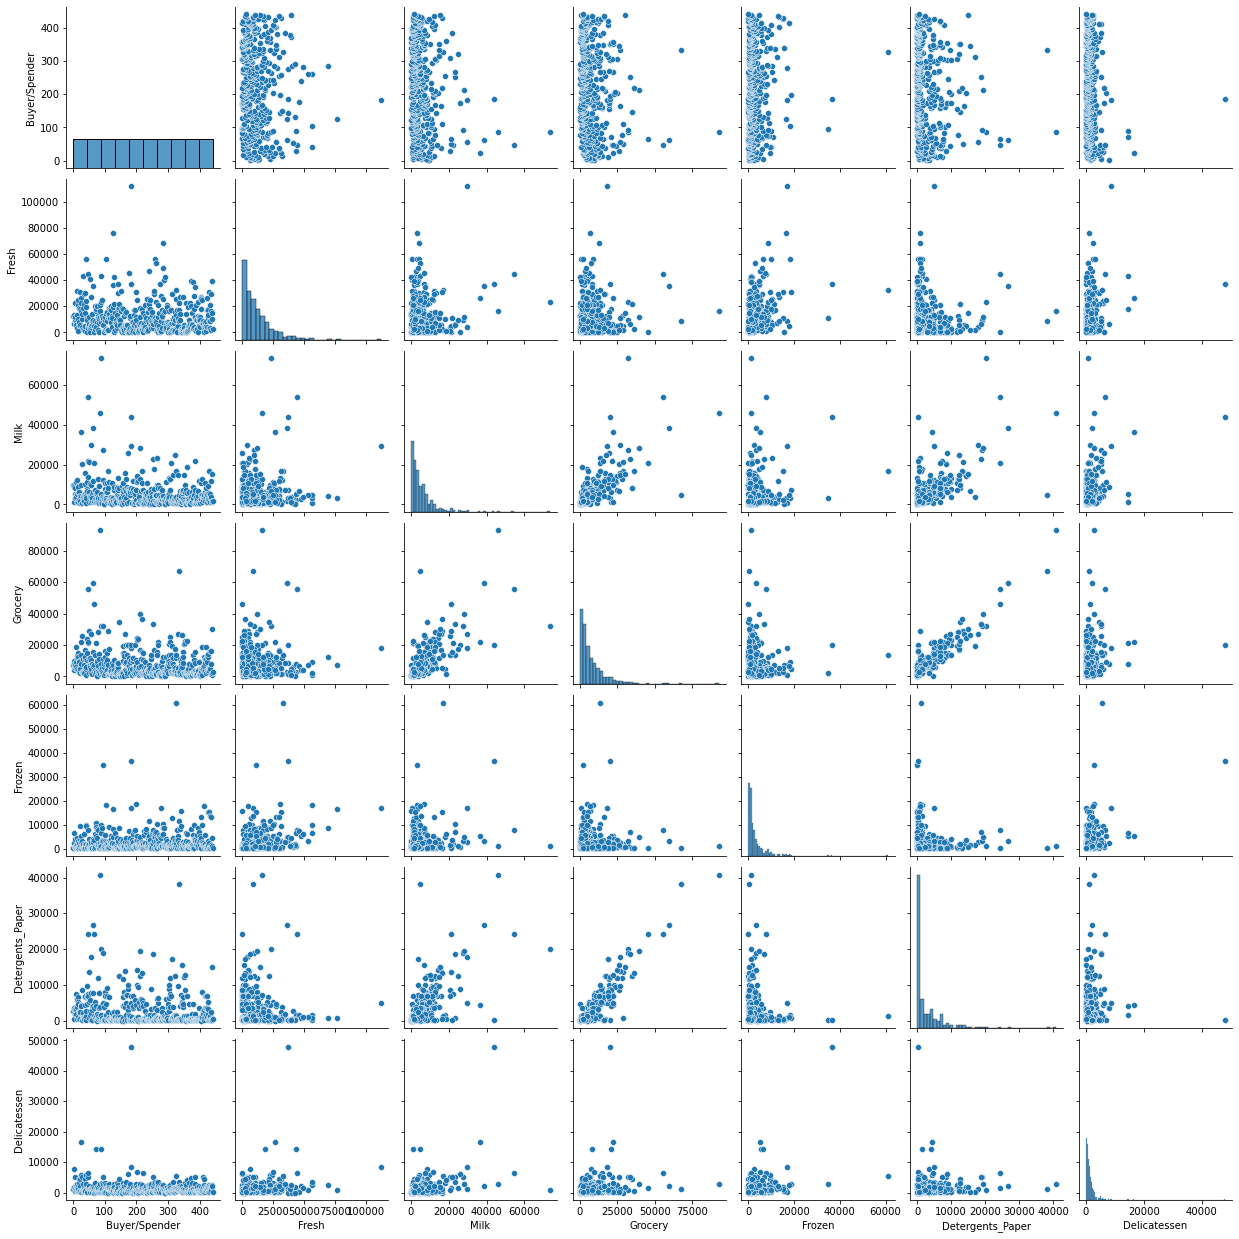

In [11]:
sns.pairplot(df)
plt.ylabel("Pairplot (Fig 2)");

1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [12]:
print("The descriptive Statistics to summarize data:")
df.describe(include="all").T

The descriptive Statistics to summarize data:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,NaN,NaN,NaN,220.5,127.161315,1.0,110.75,220.5,330.25,440.0
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [13]:
df["Region"].value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [14]:
df["Channel"].value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

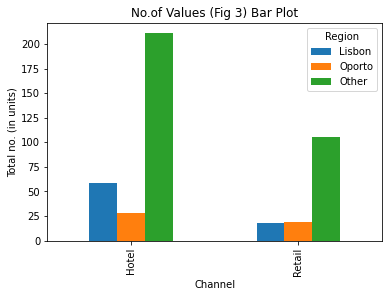

Region   Lisbon  Oporto  Other
Channel                       
Hotel        59      28    211
Retail       18      19    105


In [15]:
def counter(i,j):
    pd.crosstab(df[i],df[j]).plot(kind="bar")
    plt.title("No.of Values (Fig 3) Bar Plot")
    plt.ylabel("Total no. (in units)")
    plt.show()
    print(pd.crosstab(df[i],df[j]))
counter(i='Channel',j='Region')

In [16]:
#Adding a column "Total Spending for calculating the Spending of regions and Channel"
df["Total_Spending"]=df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']
df["Total_Spending"]

0      34112
1      33266
2      36610
3      27381
4      46100
       ...  
435    73302
436    48372
437    77407
438    17834
439     7589
Name: Total_Spending, Length: 440, dtype: int64

In [17]:
#Testing the DataFrame after adding new column
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spending
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


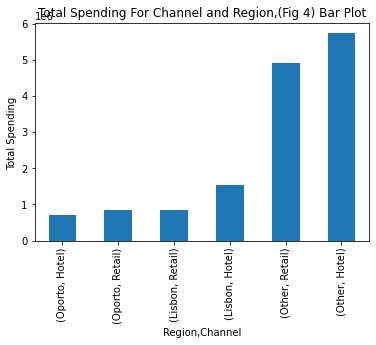

In [18]:
#Calculating the Total Spending for Both Region and Channel 
df.groupby(["Region","Channel"]).sum()["Total_Spending"].sort_values(ascending=True).plot(kind="bar")
plt.title("Total Spending For Channel and Region,(Fig 4) Bar Plot")
plt.ylabel("Total Spending ");

In [19]:
df.groupby(["Region","Channel"]).sum()["Total_Spending"]

Region  Channel
Lisbon  Hotel      1538342
        Retail      848471
Oporto  Hotel       719150
        Retail      835938
Other   Hotel      5742077
        Retail     4935522
Name: Total_Spending, dtype: int64

In [20]:
#Calculating the Total Spending Region wise
df.groupby("Region").sum()["Total_Spending"]

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total_Spending, dtype: int64

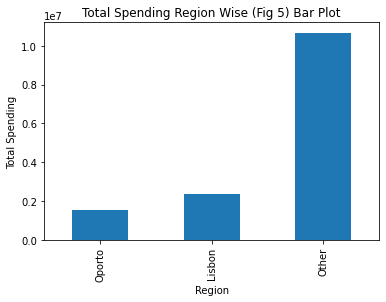

In [21]:
df.groupby("Region").sum()["Total_Spending"].sort_values(ascending=True).plot(kind="bar");
plt.title("Total Spending Region Wise (Fig 5) Bar Plot")
plt.ylabel("Total Spending");

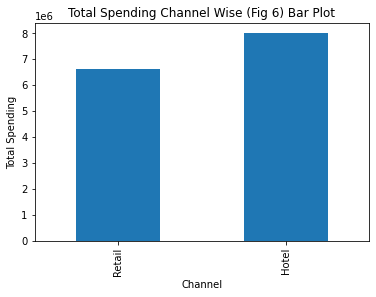

In [22]:
#Calculating the Total spending Channel wise
df.groupby("Channel").sum()["Total_Spending"].sort_values(ascending=True).plot(kind="bar")
plt.title("Total Spending Channel Wise (Fig 6) Bar Plot")
plt.ylabel("Total Spending");

In [23]:
df.groupby("Channel").sum()["Total_Spending"]

Channel
Hotel     7999569
Retail    6619931
Name: Total_Spending, dtype: int64

1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

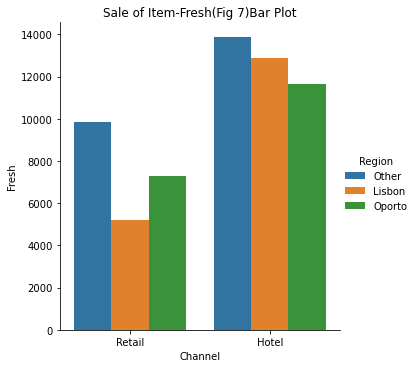

In [24]:
#Calculating the Sale of Item Fresh Channel and Region wise together
sns.catplot(x="Channel",y="Fresh",hue="Region",kind="bar",ci=None,data=df)
plt.title("Sale of Item-Fresh(Fig 7)Bar Plot");

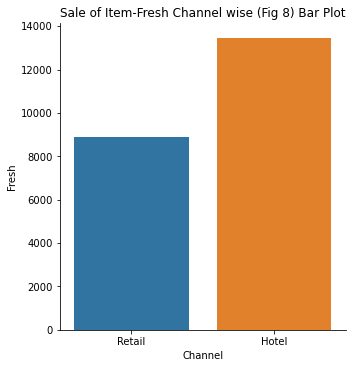

In [25]:
#Calculating the sale of Item Fresh Channel wise
sns.catplot(x="Channel",y="Fresh",kind="bar",ci=None,data=df)
plt.title("Sale of Item-Fresh Channel wise (Fig 8) Bar Plot");

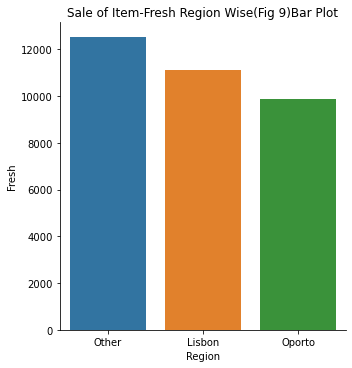

In [26]:
#Calculating the sale of Item Fresh Region wise":
sns.catplot(x="Region",y="Fresh",kind="bar",ci=None,data=df)
plt.title("Sale of Item-Fresh Region Wise(Fig 9)Bar Plot");

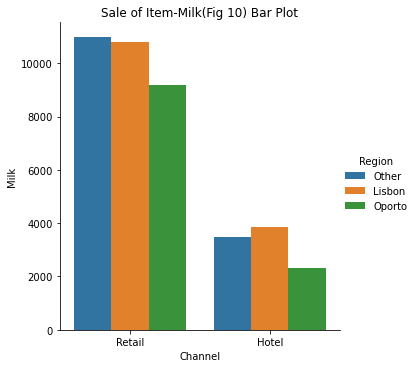

In [27]:
#Calculating the Sale of Item Milk Channel and Region wise together
sns.catplot(x="Channel",y="Milk",hue="Region",kind="bar",ci=None,data=df)
plt.title("Sale of Item-Milk(Fig 10) Bar Plot");

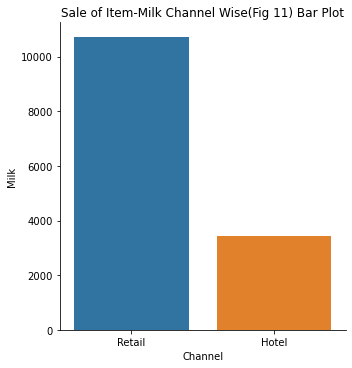

In [28]:
#Calculating the sale of Item Milk Channel wise
sns.catplot(x="Channel",y="Milk",kind="bar",ci=None,data=df)
plt.title("Sale of Item-Milk Channel Wise(Fig 11) Bar Plot");

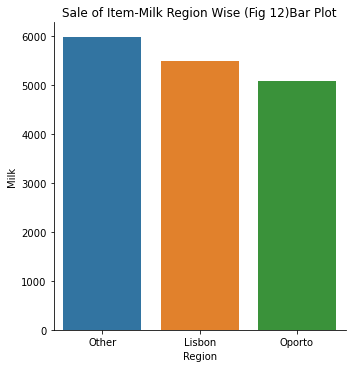

In [29]:
#Calculating the sale of Item Milk Region wise
sns.catplot(x="Region",y="Milk",kind="bar",ci=None,data=df)
plt.title("Sale of Item-Milk Region Wise (Fig 12)Bar Plot");

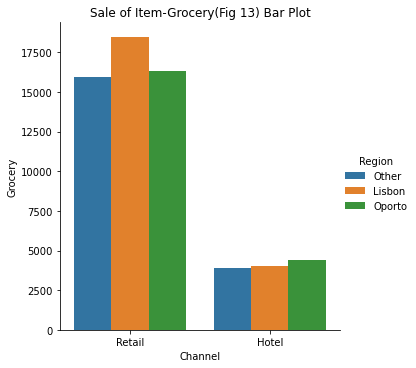

In [30]:
#Calculating the Sale of Item Grocery Channel and Region wise together
sns.catplot(x="Channel",y="Grocery",hue="Region",kind="bar",ci=None,data=df)
plt.title("Sale of Item-Grocery(Fig 13) Bar Plot");

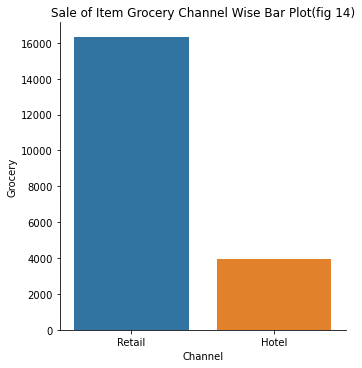

In [31]:
#Calculating the sale for Item Grocery Channel wise
sns.catplot(x="Channel",y="Grocery",kind="bar", ci=None,data=df)
plt.title("Sale of Item Grocery Channel Wise Bar Plot(fig 14)");

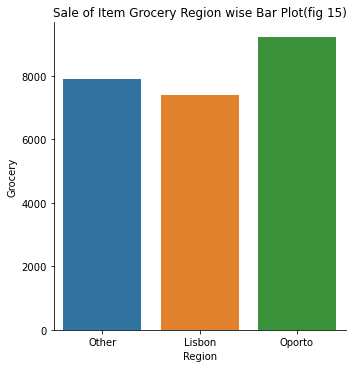

In [32]:
#Calculating the sale for Item Grocery Region wise
sns.catplot(x="Region",y="Grocery",kind="bar", ci=None,data=df)
plt.title("Sale of Item Grocery Region wise Bar Plot(fig 15)");

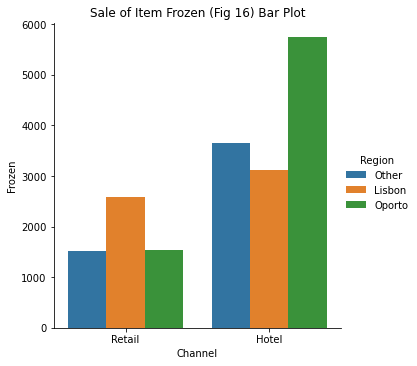

In [33]:
#Calculating the Sale of Item Frozen Channel and Region wise together
sns.catplot(x="Channel", y="Frozen", hue ="Region", kind="bar",ci=None,data=df)
plt.title("Sale of Item Frozen (Fig 16) Bar Plot");

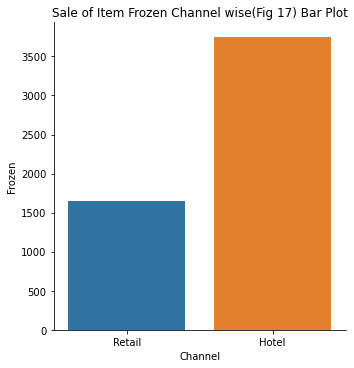

In [34]:
#Calculating the Sale of Item Frozen Channel Wise
sns.catplot(x="Channel", y="Frozen", kind="bar", ci=None, data=df)
plt.title("Sale of Item Frozen Channel wise(Fig 17) Bar Plot");

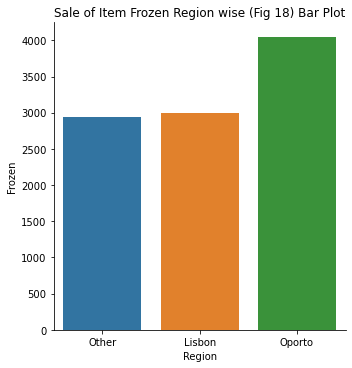

In [35]:
#Calculating the Sale of Item Frozen Region Wise
sns.catplot(x="Region", y="Frozen", kind="bar", ci=None, data=df)
plt.title("Sale of Item Frozen Region wise (Fig 18) Bar Plot");

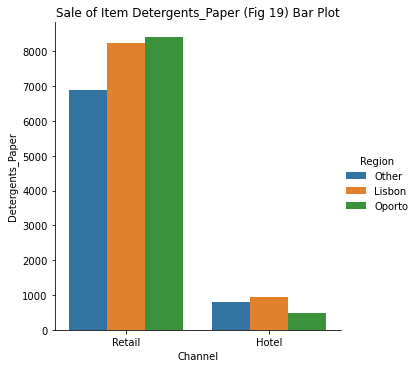

In [36]:
sns.catplot(x="Channel", y="Detergents_Paper", hue ="Region", kind="bar", ci=None, data=df)
plt.title("Sale of Item Detergents_Paper (Fig 19) Bar Plot");

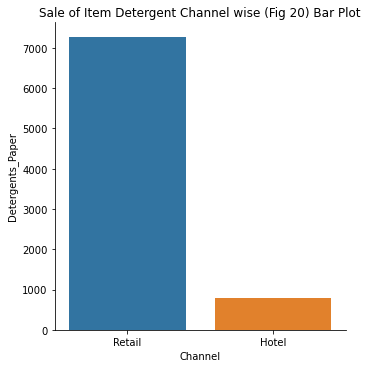

In [37]:
#Calculating the Sale of Item Frozen Channel Wise
sns.catplot(x="Channel", y="Detergents_Paper", kind="bar", ci=None, data=df)
plt.title("Sale of Item Detergent Channel wise (Fig 20) Bar Plot");

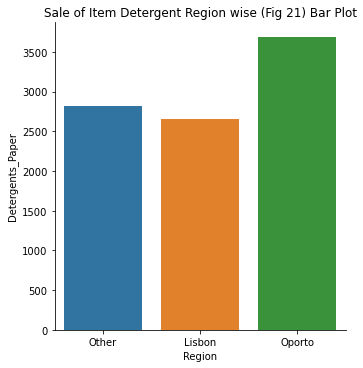

In [38]:
#Calculating the Sale of Item Frozen Region Wise
sns.catplot(x="Region", y="Detergents_Paper", kind="bar", ci=None, data=df)
plt.title("Sale of Item Detergent Region wise (Fig 21) Bar Plot");

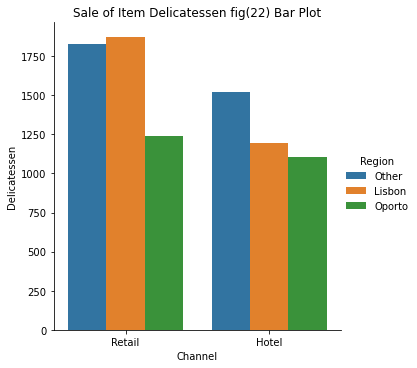

In [39]:
sns.catplot(x="Channel", y="Delicatessen", hue ="Region", kind="bar", ci=None, data=df)
plt.title('Sale of Item Delicatessen fig(22) Bar Plot');

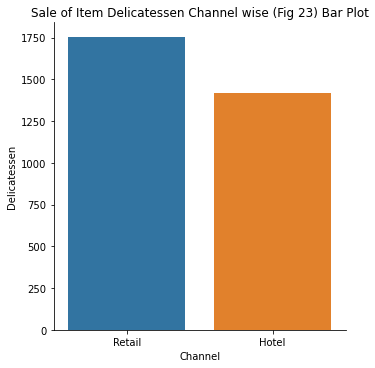

In [40]:
#Calculating the Sale of Item Delicatessen Channel Wise
sns.catplot(x="Channel", y="Delicatessen", kind="bar", ci=None, data=df)
plt.title("Sale of Item Delicatessen Channel wise (Fig 23) Bar Plot"); 

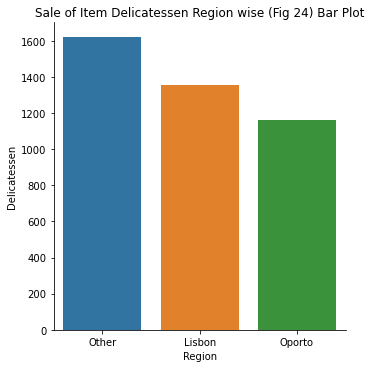

In [41]:
#Calculating the Sale of Item Delicatessen Region Wise
sns.catplot(x="Region", y="Delicatessen", kind="bar", ci=None, data=df)
plt.title("Sale of Item Delicatessen Region wise (Fig 24) Bar Plot");

1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [42]:
products = df[df.columns[+2:df.columns.size]]
products

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spending
0,Other,12669,9656,7561,214,2674,1338,34112
1,Other,7057,9810,9568,1762,3293,1776,33266
2,Other,6353,8808,7684,2405,3516,7844,36610
3,Other,13265,1196,4221,6404,507,1788,27381
4,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...
435,Other,29703,12051,16027,13135,182,2204,73302
436,Other,39228,1431,764,4510,93,2346,48372
437,Other,14531,15488,30243,437,14841,1867,77407
438,Other,10290,1981,2232,1038,168,2125,17834


In [43]:
#Calculating the Inconsistency among all the items using descriptive measures of variability
std=products.std().reset_index().iloc[0:6,:].round(2)
print("The standard deviation of the items are as follows:")
std

The standard deviation of the items are as follows:


C:\Users\Kewal\AppData\Local\Temp/ipykernel_24040/1102896021.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std=products.std().reset_index().iloc[0:6,:].round(2)


,index,0
0,Fresh,12647.33
1,Milk,7380.38
2,Grocery,9503.16
3,Frozen,4854.67
4,Detergents_Paper,4767.85
5,Delicatessen,2820.11


Calculating the inconsistency behaviour among the items using the Coefficient of variance


In [44]:
CV_Fresh=np.std(products["Fresh"])/np.mean(products["Fresh"])
print("The coefficicent of variance of item Fresh is:",CV_Fresh)

The coefficicent of variance of item Fresh is: 1.0527196084948245


In [45]:
CV_Milk=np.std(products["Milk"])/np.mean(products["Milk"])
print("The coefficicent of variance of item Milk is:",CV_Milk)

The coefficicent of variance of item Milk is: 1.2718508307424503


In [46]:
CV_Grocery=np.std(products["Grocery"])/np.mean(products["Grocery"])
print("The coefficicent of variance of item Grocery is:",CV_Grocery)

The coefficicent of variance of item Grocery is: 1.193815447749267


In [47]:
CV_Frozen=np.std(products["Frozen"])/np.mean(products["Frozen"])
print("The coefficicent of variance of item Frozen is:",CV_Frozen)

The coefficicent of variance of item Frozen is: 1.5785355298607762


In [48]:
CV_Detergents_Paper=np.std(products["Detergents_Paper"])/np.mean(products["Detergents_Paper"])
print("The coefficicent of variance of item Detergents_Paper is:",CV_Detergents_Paper)

The coefficicent of variance of item Detergents_Paper is: 1.6527657881041729


In [49]:
CV_Delicatessen=np.std(products["Delicatessen"])/np.mean(products["Delicatessen"])
print("The coefficicent of variance of item Delicatessen is:",CV_Delicatessen)

The coefficicent of variance of item Delicatessen is: 1.8473041039189306


1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kewal\anaconda3\lib\si

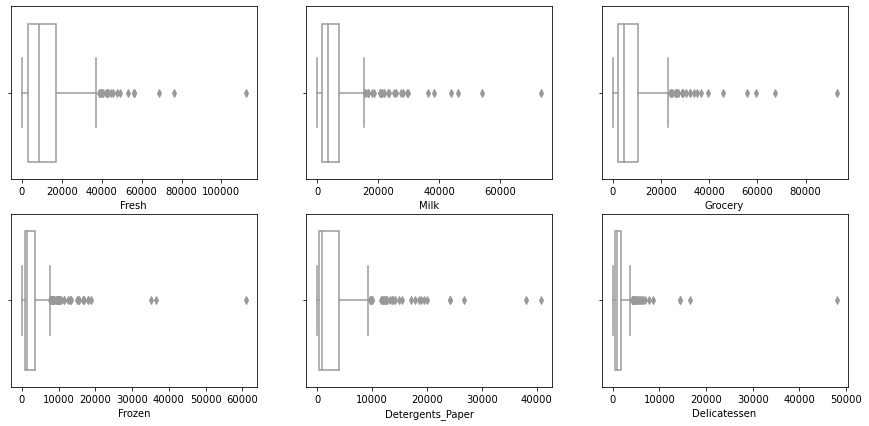

In [50]:
plt.figure(figsize=(15,7))
plt.subplot(2,3,1)
sns.boxplot(x=df.Fresh,color="White")
plt.subplot(2,3,2)
sns.boxplot(x=df.Milk,color="White")
plt.subplot(2,3,3)
sns.boxplot(df.Grocery,color="White")
plt.subplot(2,3,4)
sns.boxplot(df.Frozen,color="White")
plt.subplot(2,3,5)
sns.boxplot(df.Detergents_Paper,color="White")
plt.subplot(2,3,6)
sns.boxplot(df.Delicatessen,color="White");

In [51]:
df.describe().iloc[:,1:7].round(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00
mean,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,3.00,55.00,3.00,25.00,3.00,3.00
25%,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

Mentioned in the Business report

    Problem 2

In [52]:
df1=pd.read_csv("Survey-1.csv")

In [53]:
df1.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [54]:
df1.tail()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50
61,62,Female,23,Senior,Economics/Finance,No,3.2,Part-Time,70.0,2,3,250,Laptop,0


In [55]:
df1.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [57]:
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,62.0,NaN,NaN,NaN,31.5,18.041619,1.0,16.25,31.5,46.75,62.0
Gender,62,2,Female,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,62.0,NaN,NaN,NaN,21.129032,1.431311,18.0,20.0,21.0,22.0,26.0
Class,62,3,Senior,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Major,62,8,Retailing/Marketing,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grad Intention,62,3,Yes,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPA,62.0,NaN,NaN,NaN,3.129032,0.377388,2.3,2.9,3.15,3.4,3.9
Employment,62,3,Part-Time,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,62.0,NaN,NaN,NaN,48.548387,12.080912,25.0,40.0,50.0,55.0,80.0
Social Networking,62.0,NaN,NaN,NaN,1.516129,0.844305,0.0,1.0,1.0,2.0,4.0


2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1 Gender and Major

In [58]:
Gender_Major=pd.crosstab(df1["Gender"],df1["Major"],margins=True)
Gender_Major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


2.1.2. Gender and Grad Intention

In [59]:
Gender_GradIntention=pd.crosstab(df1["Gender"],df1["Grad Intention"],margins=True)
Gender_GradIntention

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


2.1.3. Gender and Employment

In [60]:
Gender_Employement=pd.crosstab(df1["Gender"],df1["Employment"],margins=True)
Gender_Employement

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


2.1.4 Gender and Computer

In [61]:
Gender_Computer=pd.crosstab(df1["Gender"],df1["Computer"],margins=True)
Gender_Computer

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [62]:
df1["Gender"].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [63]:
print("The probability that the selected candidate is a Male:",29/len(df1["Gender"]))

The probability that the selected candidate is a Male: 0.46774193548387094


2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [64]:
df1["Gender"].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [65]:
print("The probability that the selected candidate is a Female:",33/len(df1["Gender"]))

The probability that the selected candidate is a Female: 0.532258064516129


2.3 Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.3.1. Find the conditional probability of different majors among the male students in CMSU

In [66]:
Gender_Major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [67]:
df1["Gender"].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [68]:
print("The conditional probability of different majors among male candidates is:")
print("")
print("Probabilty of a Male Majoring in Accounting is", 4/29)
print("")
print("Probabilty of a Male Majoring in CIS is ",1/29)
print("")
print('Probabilty of a Male Majoring in Economic/Finance is',4/29)
print("")
print('Probabilty of a Male Majoring in Management is',6/29)
print("")
print("Probabilty of a Male Majoring in International Business is",2/29)
print("")
print("Probability of a Male Majoring in other is ",4/29)
print("")
print("Probability of a Male Majoring in Retail/Marketing is",5/29)
print("")
print("Probabilty of a Male whose Majors are undecided is",3/29)

The conditional probability of different majors among male candidates is:

Probabilty of a Male Majoring in Accounting is 0.13793103448275862

Probabilty of a Male Majoring in CIS is  0.034482758620689655

Probabilty of a Male Majoring in Economic/Finance is 0.13793103448275862

Probabilty of a Male Majoring in Management is 0.20689655172413793

Probabilty of a Male Majoring in International Business is 0.06896551724137931

Probability of a Male Majoring in other is  0.13793103448275862

Probability of a Male Majoring in Retail/Marketing is 0.1724137931034483

Probabilty of a Male whose Majors are undecided is 0.10344827586206896


2.3.2 Find the conditional probability of different majors among the female students of CMSU

In [69]:
df1["Gender"].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [70]:
Gender_Major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [71]:
print("The Conditional Probability of different Majors among Female candidates is:")
print("")
print("Probabilty of a Female Majoring in Accounting is",3/33)
print("")
print("Probabilty of a Female Majoring in CIS is ",3/33)
print("")
print('Probabilty of a Female Majoring in Economic/Finance is',7/33)
print("")
print('Probabilty of a Female Majoring in Management is',4/33)
print("")
print("Probabilty of a Female Majoring in International Business is",4/33)
print("")
print("Probability of a Female Majoring in other is ",3/33)
print("")
print("Probability of a Female Majoring in Retail/Marketing is",9/33)
print("")
print("Probabilty of Females whose Majors are undecided is",0/33)

The Conditional Probability of different Majors among Female candidates is:

Probabilty of a Female Majoring in Accounting is 0.09090909090909091

Probabilty of a Female Majoring in CIS is  0.09090909090909091

Probabilty of a Female Majoring in Economic/Finance is 0.21212121212121213

Probabilty of a Female Majoring in Management is 0.12121212121212122

Probabilty of a Female Majoring in International Business is 0.12121212121212122

Probability of a Female Majoring in other is  0.09090909090909091

Probability of a Female Majoring in Retail/Marketing is 0.2727272727272727

Probabilty of Females whose Majors are undecided is 0.0


2.4 Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate

In [72]:
Gender_GradIntention

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [73]:
#Using the contingency table of Gender_GradIntention we get the total number of males and males intending to graduated
print("The probability that the randomly chosen student is male and Intends to Graduate is:",17/29*100)

The probability that the randomly chosen student is male and Intends to Graduate is: 58.620689655172406


2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [74]:
Gender_Computer

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [75]:
# P(No Laptop ∩ Female) = (Total Female- Female with Laptop)/Total Female
print("The probability that a randomly selected student is a female and does not have laptop is:",(33-29)/33*100)

The probability that a randomly selected student is a female and does not have laptop is: 12.121212121212121


2.5 Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

In [76]:
Gender_Employement

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [77]:
#Since The given data for Gender and employee is not mutually exclusive we use P(A or B)=P(A)+P(B)-P(A∩B)
#(Male Or Full Time Employement)=P(Male)+P(Full Time Employement)-P(Male and Full time Employed)
#P(Male)=29/62
#P(Full time employement)=10/62
#P(Male and Full time employed)=7/29
print("The Probability that a randomly chosen student is a male or has full time employement is:",((29/62+10/62)-(7/29))*100)

The Probability that a randomly chosen student is a male or has full time employement is: 38.76529477196885


2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [78]:
Gender_Major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [79]:
##Since The given data for Gender and Major is mutually exclusive we use P(A or B)=P(A)+P(B)
#Using the formula P(A|B)=P(A∩B)/P(B), where,
#P(A)=Majoring in International business or Management =4/33 +4/33=0.24
#P(B)=The student is a female =33/62=0.53
print("The conditional probability that given a female student is randomly chosen, she is majoring in international business or management is:",(0.24*0.53)/0.53)

The conditional probability that given a female student is randomly chosen, she is majoring in international business or management is: 0.24


2.6 Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [80]:
#Constructing a new Contingency Table by dropping column Undecided:
Gender_GraduationIntention1=Gender_GradIntention.drop(["Undecided"],axis=1)
Gender_GraduationIntention1

Grad Intention,No,Yes,All
Gender,,,
Female,9,11,33
Male,3,17,29
All,12,28,62


2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Answer the following questions based on the data

2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [81]:
Gender_GPA=pd.crosstab(df1["Gender"],df1["GPA"],margins=True)
Gender_GPA

GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,All
Gender,,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1,33
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0,29
All,1,1,6,2,3,4,7,7,6,5,7,6,3,2,1,1,62


In [82]:
#Using the above contingency table we find our that:
print("The probability that the random student's GPA is less than 3 is:",17/62*100,"%")

The probability that the random student's GPA is less than 3 is: 27.419354838709676 %


2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more

In [83]:
Gender_Salary=pd.crosstab(df1["Gender"],df1["Salary"],margins=True)
Gender_Salary

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0,All
Gender,,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1,33
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1,29
All,1,5,2,1,1,12,1,5,1,1,9,1,1,8,8,1,1,1,2,62


In [84]:
#From the above contingency table we get to know that:
print("The conditional probability of a random male selected earns 50 or more is:",14/29*100,"%")

The conditional probability of a random male selected earns 50 or more is: 48.275862068965516 %


In [85]:
#From the above contingency table we get to know that:
print("The conditional probability of a random Female selected earns 50 or more is:",18/33*100,"%")

The conditional probability of a random Female selected earns 50 or more is: 54.54545454545454 %


2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions

In [86]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,62.0,31.500000,18.041619,1.0,16.25,31.50,46.75,62.0
Age,62.0,21.129032,1.431311,18.0,20.00,21.00,22.00,26.0
GPA,62.0,3.129032,0.377388,2.3,2.90,3.15,3.40,3.9
Salary,62.0,48.548387,12.080912,25.0,40.00,50.00,55.00,80.0
Social Networking,62.0,1.516129,0.844305,0.0,1.00,1.00,2.00,4.0
Satisfaction,62.0,3.741935,1.213793,1.0,3.00,4.00,4.00,6.0
Spending,62.0,482.016129,221.953805,100.0,312.50,500.00,600.00,1400.0
Text Messages,62.0,246.209677,214.465950,0.0,100.00,200.00,300.00,900.0


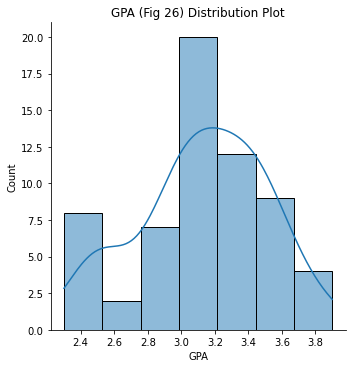

In [87]:
sns.displot(df1["GPA"],kde=True)
plt.title("GPA (Fig 26) Distribution Plot");

In [88]:
GPA_mean=GPA_mean=np.mean(df1["GPA"])
print("The mean for GPA is",GPA_mean)

The mean for GPA is 3.129032258064516


In [89]:
GPA_std=np.std(df1["GPA"])
print("The standard deviation for GPA is",GPA_std)

The standard deviation for GPA is 0.37433256594525566


In [90]:
GPA_median=np.median(df1["GPA"])
print("The Median for GPA is",GPA_median)

The Median for GPA is 3.1500000000000004


In [91]:
GPA_mode=df1["GPA"].mode()
print("The mode for GPA is",GPA_mode)

The mode for GPA is 0    3.0
1    3.1
2    3.4
dtype: float64


C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


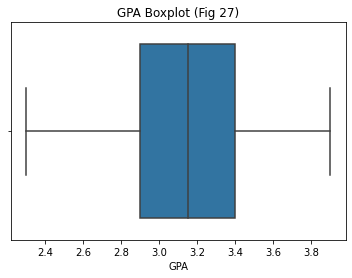

In [92]:
sns.boxplot(df1["GPA"])
plt.title("GPA Boxplot (Fig 27)");

In [93]:
#H0:It is normally Distributed
#HA:It is not normally distributed
#Alpha=0.05
stats.shapiro(df1["GPA"])

ShapiroResult(statistic=0.9685361981391907, pvalue=0.11204058676958084)

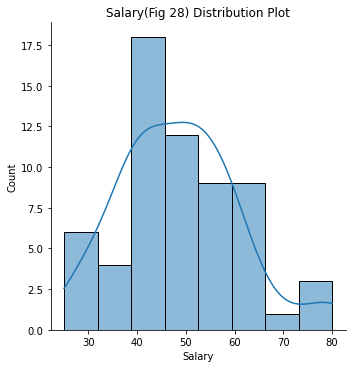

In [94]:
sns.displot(df1["Salary"],kde=True)
plt.title("Salary(Fig 28) Distribution Plot");

In [95]:
salary_mean=np.mean(df1["Salary"])
print(" The mean for Salary is",salary_mean)

 The mean for Salary is 48.54838709677419


In [96]:
salary_std=np.std(df1["Salary"])
print("The standard deviation for Salary is:",salary_std)

The standard deviation for Salary is: 11.983089454828177


In [97]:
salary_median=np.median(df1["Salary"])
print("The median for salary is:",salary_median)

The median for salary is: 50.0


In [98]:
salary_mode=df1["Salary"].mode()
print("The mode for salary is",salary_mode)

The mode for salary is 0    40.0
dtype: float64


C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


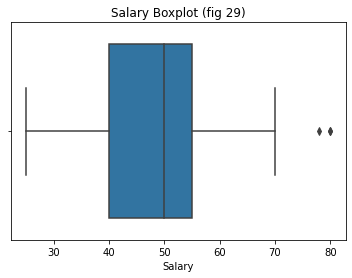

In [99]:
sns.boxplot(df1["Salary"])
plt.title("Salary Boxplot (fig 29)");

In [100]:
#H0:It is normally Distributed
#HA:It is not normally distributed
#Alpha=0.05
stats.shapiro(df1["Salary"])

ShapiroResult(statistic=0.9565856456756592, pvalue=0.028000956401228905)

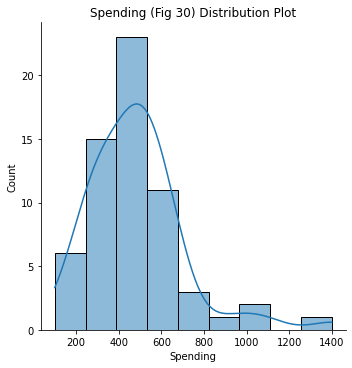

In [101]:
sns.displot(df1["Spending"],kde=True)
plt.title("Spending (Fig 30) Distribution Plot");

C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


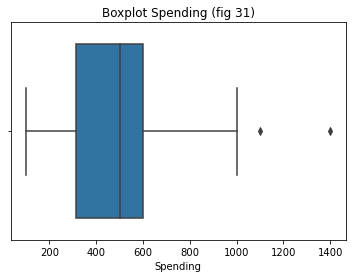

In [102]:
sns.boxplot(df1["Spending"])
plt.title("Boxplot Spending (fig 31)");

In [103]:
spending_mean=np.mean(df1["Spending"])
print("The mean for spending is",spending_mean)

The mean for spending is 482.01612903225805


In [104]:
spending_median=np.median(df1["Spending"])
print("The median for spending is",spending_median)

The median for spending is 500.0


In [105]:
spending_mode=df1["Spending"].mode()
print("The mode for spending is",spending_mode)

The mode for spending is 0    500
dtype: int64


In [106]:
spending_std=np.std(df1["Spending"])
print("The standard deviation for spending is:",spending_std)

The standard deviation for spending is: 220.1565785859987


In [107]:
#H0:It is normally Distributed
#HA:It is not normally distributed
#Alpha=0.05
stats.shapiro(df1["Spending"])

ShapiroResult(statistic=0.8777452111244202, pvalue=1.6854661225806922e-05)

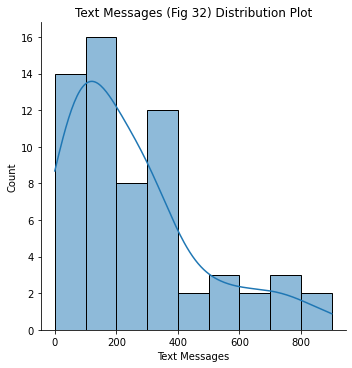

In [108]:
sns.displot(df1["Text Messages"],kde=True)
plt.title("Text Messages (Fig 32) Distribution Plot");

C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


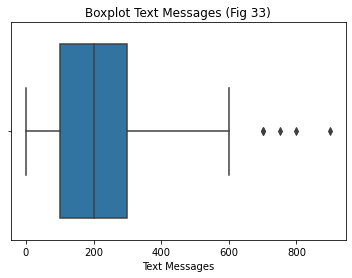

In [109]:
sns.boxplot(df1["Text Messages"])
plt.title("Boxplot Text Messages (Fig 33)");

In [110]:
Text_Messages_std=np.std(df1["Text Messages"])
print("The standard deviation for Text Messages is:",Text_Messages_std)

The standard deviation for Text Messages is: 212.72935532273155


In [111]:
Text_Messages_mean=np.mean(df1["Text Messages"])
print("The mean for text messages is:",Text_Messages_mean)

The mean for text messages is: 246.20967741935485


In [112]:
Text_messages_mode=df1["Text Messages"].mode()
print("The mode for Text Messages is:",Text_messages_mode)

The mode for Text Messages is: 0    300
dtype: int64


In [113]:
Text_messages_median=np.median(df1["Text Messages"])
print("The Median for text messages is:",Text_messages_median )

The Median for text messages is: 200.0


In [114]:
#H0:It is normally Distributed
#HA:It is not normally distributed
#Alpha=0.05
stats.shapiro(df1["Text Messages"])

ShapiroResult(statistic=0.8594191074371338, pvalue=4.324040673964191e-06)

Problem 3 

In [121]:
df2=pd.read_csv("A+&+B+shingles.csv")
df2.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [122]:
df2.tail()

,A,B
31,0.40,NaN
32,0.29,NaN
33,0.43,NaN
34,0.34,NaN
35,0.37,NaN


In [123]:
df2.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


In [124]:
df2.isnull().sum()

A    0
B    5
dtype: int64

In [125]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [126]:
t_statistic,p_value=ttest_1samp(df2.A,0.35)
print("t statistic is:",t_statistic,"p value is:",p_value/2)

t statistic is: -1.4735046253382782 p value is: 0.07477633144907513


In [127]:
t_statistic,p_value=ttest_1samp(df2.B,0.35,nan_policy="omit")
print("t statistic is:",t_statistic,"p value is:",p_value/2)

t statistic is: -3.1003313069986995 p value is: 0.0020904774003191826


3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [128]:
tstatistic,pvalue=stats.ttest_ind(df2["A"],df2["B"],nan_policy="omit")
print("t statistic is:",tstatistic,"p value is:",pvalue/2)

t statistic is: 1.2896282719661123 p value is: 0.1008748285917653
